# PART ONE - Import from CSV
The below code is run only once to extract information for ID range for Group 8

In [68]:
import sys
import csv
import pandas as pd
csv.field_size_limit(sys.maxsize)




9223372036854775807

In [69]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [70]:
cd /content/drive/MyDrive/CECS550_DATASET

/content/drive/MyDrive/CECS550_DATASET


In [71]:
path = "new_data.csv"
reader = pd.read_csv(path)

In [72]:
rows = []
def extract_number(string):
    if pd.isna(string):
        return 0
    else:
        string = str(string)
        return int(string.split(':')[0])

for i,row in reader.iterrows():
    activity_logs = row['activity_log']
    if not pd.isna(activity_logs):
        item_ids = []
        for activity_log in activity_logs.split('#'):
            item_id = extract_number(activity_log)
            if item_id >= 1121 and item_id <= 1280:
                item_ids.append(activity_log)
        if item_ids:
            row['new_activity_log'] = '#'.join(item_ids)
            rows.append(row)

df_1 = pd.DataFrame(rows)
print(df_1.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2606 entries, 0 to 2605
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0.2      2606 non-null   int64  
 1   Unnamed: 0.1      2606 non-null   int64  
 2   Unnamed: 0        2606 non-null   int64  
 3   user_id           2606 non-null   int64  
 4   age_range         2600 non-null   float64
 5   gender            2590 non-null   float64
 6   merchant_id       2606 non-null   int64  
 7   label             2606 non-null   int64  
 8   activity_log      2606 non-null   object 
 9   new_activity_log  2606 non-null   object 
dtypes: float64(2), int64(6), object(2)
memory usage: 224.0+ KB
None


In [73]:
# Drop activity_log column and rename new_activity_log to activity_log
df_1 = df_1.drop('activity_log', axis=1).rename(columns={'new_activity_log': 'activity_log'})

In [74]:
# select rows where label is 1 and only 8 from df_1 has label
data_with_label_1 = reader[reader['label'] == 1]
# randomly select 20% of the rows where label is 1
df_2 = data_with_label_1.sample(frac=0.012, random_state=42)
df_new = pd.concat([df_1, df_2])

In [75]:
#Use this new data - from now on
df_new.to_csv('new_data.csv')

# PART TWO - Importing assigned csv

In [76]:
import sys
import csv
import pandas as pd
csv.field_size_limit(sys.maxsize)
path = "new_data.csv"
df = pd.read_csv(path)

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2606 entries, 0 to 2605
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0.3  2606 non-null   int64  
 1   Unnamed: 0.2  2606 non-null   int64  
 2   Unnamed: 0.1  2606 non-null   int64  
 3   Unnamed: 0    2606 non-null   int64  
 4   user_id       2606 non-null   int64  
 5   age_range     2600 non-null   float64
 6   gender        2590 non-null   float64
 7   merchant_id   2606 non-null   int64  
 8   label         2606 non-null   int64  
 9   activity_log  2606 non-null   object 
dtypes: float64(2), int64(7), object(1)
memory usage: 203.7+ KB


In [78]:
# Spliting activity_log by "#" and creating a list of lists
logs = [log.split('#') for log in df['activity_log']]
# Spliting each log by ":" and extracting individual values
item_ids = []
category_ids = []
brand_ids = []
time_stamps = []
action_types = []

for log in logs:
    item_ids_temp = []
    category_ids_temp = []
    brand_ids_temp = []
    time_stamps_temp = []
    action_types_temp = []
    for entry in log:
        entry_values = entry.split(':')
        item_ids_temp.append(entry_values[0])
        category_ids_temp.append(entry_values[1])
        brand_ids_temp.append(entry_values[2])
        time_stamps_temp.append(entry_values[3])
        action_types_temp.append(entry_values[4])
        
    item_ids.append(item_ids_temp)
    category_ids.append(category_ids_temp)
    brand_ids.append(brand_ids_temp)
    time_stamps.append(time_stamps_temp)
    action_types.append(action_types_temp)

# Added new columns for each extracted value
df['item_id'] = item_ids
df['category_id'] = category_ids
df['brand_id'] = brand_ids
df['time_stamp'] = time_stamps
df['action_type'] = action_types

# Droped activity_log column - not needed
df = df.drop('activity_log', axis=1)

In [79]:
print(df.head(5))

   Unnamed: 0.3  Unnamed: 0.2  Unnamed: 0.1  Unnamed: 0  user_id  age_range  \
0             0             0             0       14527   338817        3.0   
1             1             1             1       15997   149121        5.0   
2             2             2             2       16308    85377        3.0   
3             3             3             3       16312    85377        3.0   
4             4             4             4       18315    35202        3.0   

   gender  merchant_id  label       item_id category_id      brand_id  \
0     0.0          506     -1        [1194]       [464]        [7500]   
1     1.0         2468     -1        [1265]       [776]        [1392]   
2     1.0         3183     -1  [1272, 1272]  [407, 407]  [8235, 8235]   
3     1.0         3491     -1        [1151]      [1611]        [3969]   
4     1.0         1887     -1        [1142]      [1389]        [3481]   

     time_stamp action_type  
0        [0511]         [3]  
1        [0822]         [0

# Data PreProcessing


In [80]:
#The below code handles null values for age range and gender

#Data Visualization

In [81]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

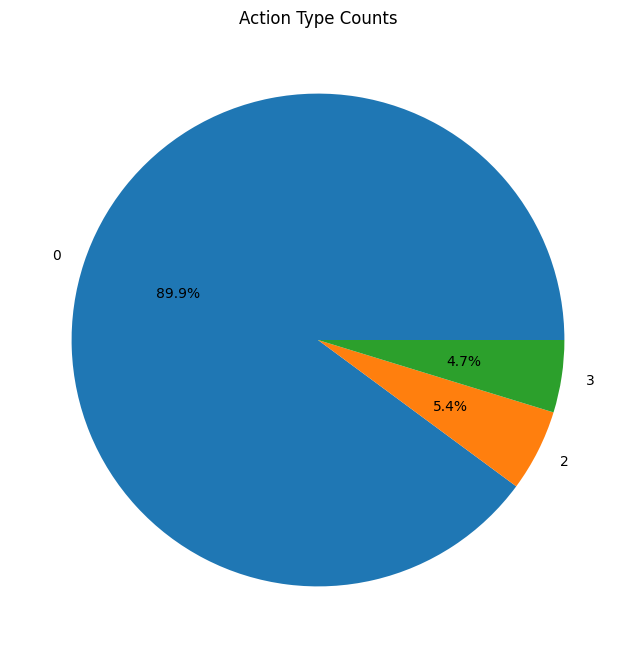

In [82]:
#Chart 1 : Most action type performed by customer 
# 88.2% clicked once - 4.5% add to favourite - 7.3% purchased info
# Count the number of occurrences of each action type
action_counts = df['action_type'].explode().value_counts()

# Create a pie chart of the action_type counts
plt.figure(figsize=(8, 8))
plt.pie(action_counts.values, labels=action_counts.index, autopct='%1.1f%%')
plt.title('Action Type Counts')
plt.show()


ValueError: ignored

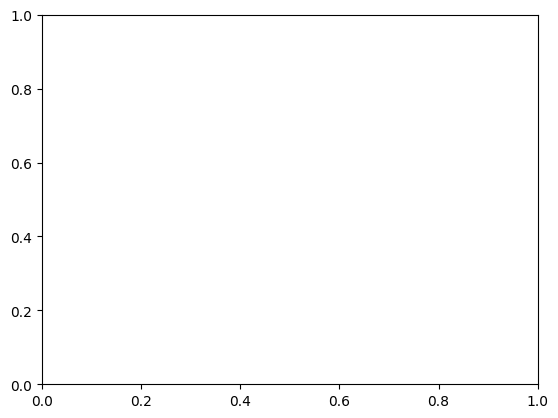

In [83]:

#Chart 2 : This code will plot a bar chart of the top 10 famous merchants with the highest number of repeated users, sorted in descending order. 

# Filtering the dataframe to only include rows with label = 1
df_repeated = df[df['label'] == 1]
# Grouping the data by merchant_id and count the number of unique user_ids
merchant_counts = df_repeated.groupby('merchant_id')['user_id'].nunique()
# Sorting the merchant counts in descending order
merchant_counts = merchant_counts.sort_values(ascending=False)
#top 10 famous merchants
N = 10
plt.bar(range(N), merchant_counts.values[:N])
plt.xticks(range(N), merchant_counts.index[:N])
plt.xlabel('Merchant ID')
plt.ylabel('Number of Repeated Users')
plt.title('Famous Merchants with Repeated Users (Label = 1)')
plt.show()



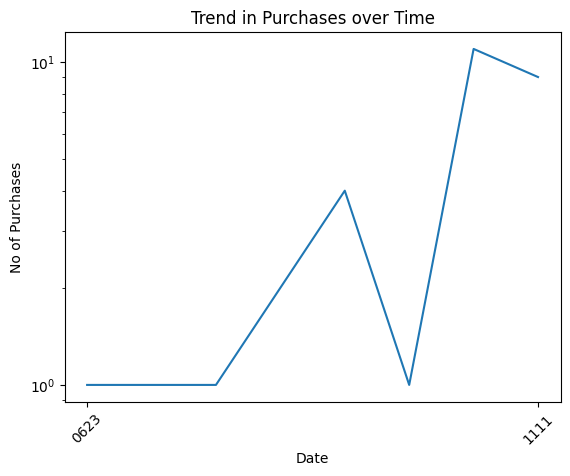

In [84]:
#trend in activity over-time for repeated buyers
purchased_rep = df[df['label'] == 1]
new_df = purchased_rep.explode('time_stamp')
new_df['date'] = new_df['time_stamp'].apply(lambda x: x[0][:2] + '/' + x[0][2:])
purchases_by_day = new_df.groupby('time_stamp').size()
plt.plot(purchases_by_day.index, purchases_by_day.values)
plt.yscale('log')
plt.xlabel('Date')
plt.ylabel('No of Purchases')
plt.title('Trend in Purchases over Time')
plt.xticks(np.arange(0, len(purchases_by_day), 7), purchases_by_day.index[::7], rotation=45)
plt.show()

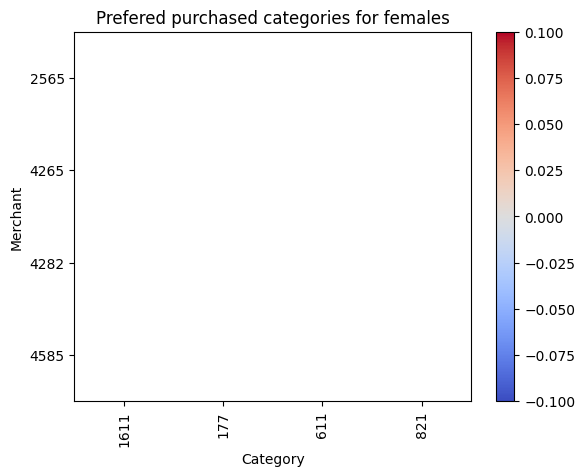

In [85]:
#Chart 4: Preferd purchased categories for female
purchased_items = df[(df['label']==1) & (df['gender']==1)]
purchased_items_new = purchased_items.explode('category_id')
item_counts = purchased_items_new.groupby(['merchant_id', 'category_id']).size().unstack(fill_value=2)

#considered categories if the no of purchases are more than 10
item_counts = item_counts[item_counts > 10]
plt.imshow(item_counts, cmap='coolwarm', aspect='auto', vmin=item_counts.min().min(), vmax=item_counts.max().max())
plt.xticks(range(len(item_counts.columns)), item_counts.columns, rotation=90)
plt.yticks(range(len(item_counts.index)), item_counts.index)
plt.xlabel('Category')
plt.ylabel('Merchant')
plt.colorbar()
plt.title('Prefered purchased categories for females')


plt.locator_params(axis='x', nbins=10)
plt.locator_params(axis='y', nbins=10)

<ipython-input-86-38a9270e9f11>:9: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  plt.imshow(item_counts, cmap='coolwarm', aspect='auto', vmin=item_counts.min().min(), vmax=item_counts.max().max())
<ipython-input-86-38a9270e9f11>:9: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  plt.imshow(item_counts, cmap='coolwarm', aspect='auto', vmin=item_counts.min().min(), vmax=item_counts.max().max())


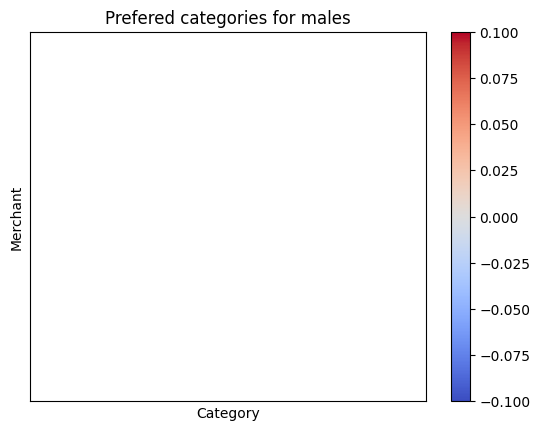

In [86]:
#Chart 4: Preferd purchased categories for males
purchased_items = df[(df['label']==1) & (df['gender']==2)]
purchased_items_new = purchased_items.explode('category_id')
item_counts = purchased_items_new.groupby(['merchant_id', 'category_id']).size().unstack(fill_value=2)

#considered categories if the no of purchases are more than 10
item_counts = item_counts[item_counts > 2]

plt.imshow(item_counts, cmap='coolwarm', aspect='auto', vmin=item_counts.min().min(), vmax=item_counts.max().max())
plt.xticks(range(len(item_counts.columns)), item_counts.columns, rotation=90)
plt.yticks(range(len(item_counts.index)), item_counts.index)
plt.xlabel('Category')
plt.ylabel('Merchant')
plt.colorbar()
plt.title('Prefered categories for males')


plt.locator_params(axis='x', nbins=20)
plt.locator_params(axis='y', nbins=20)


#Feature Engineering

In [87]:
#Feature : 1
#Profile - user
#U_merchant_buy_item_num_avg - averge number of unique items bought from merchants by the user
# Group the data by user and merchant, then count the number of unique items bought

group1_df = df.explode('item_id')
unique_items = group1_df.groupby(['user_id', 'merchant_id'])['item_id'].nunique()
# Average of these counts for each user
avg_unique_items = unique_items.groupby('user_id').mean()
# Adding new feature to the DataFrame
df['avg_unique_items_per_user'] = df['user_id'].map(avg_unique_items)

In [88]:
#Feature : 2
#Profile - merchant
#The number of days that users made a purchase from the merchant

group2_df = df.explode('time_stamp')
# Converting to datetime format
group2_df['time_stamp'] = pd.to_datetime(group2_df['time_stamp'], format='%m%d')

# Calculating the number of days between each purchase made by each user from each merchant
days_between_purchases = group2_df.groupby(['user_id', 'merchant_id'])['time_stamp'].apply(lambda x: np.diff(x).astype('timedelta64[D]')).to_frame()
days_between_purchases = days_between_purchases[days_between_purchases['time_stamp'].str.len() > 0]

In [89]:
#feature : 3 - user
#extract proporting of repeated purchased days of only female users within 30 days
threshold = pd.Timedelta(days=30)

grou3_df = df.explode('time_stamp')
grou3_df = grou3_df[(grou3_df['gender'] == 0) & (grou3_df['label'] == 1)]
groups = grou3_df.groupby('user_id')

#calculate repeated buyer for each group
repeated_female_buyer_days_per_user = []
for user_id, group in groups:
    dates = pd.to_datetime(group['time_stamp'], format='%m%d')
    diffs = dates.diff()
    repeated_female_buyer_days_per_user.append((diffs <= threshold).sum())

# Calculate the proportion of repeated purchased date
total_users = len(groups)
users_with_repeat_buy_days = (pd.Series(repeated_female_buyer_days_per_user) > 0).sum()
proportion_of_repeat_buy_days = users_with_repeat_buy_days / total_users
df['proportion_of_repeat_buy_days'] = df['user_id'].map({u: proportion_of_repeat_buy_days for u in df['user_id'].unique()})

print(proportion_of_repeat_buy_days)

0.5


In [90]:
#feature : 4 - items
#Items that were clicked in during highest activity months - October and November
group4_df = df.explode('time_stamp').explode('action_type')
group4_df = group4_df[(group4_df['action_type'] == '0')]
df_clicked_oct_nov = group4_df[group4_df['time_stamp'].apply(lambda x: x[0:2] in ['10', '11'])]
items_clicked = df_clicked_oct_nov['item_id'].explode('item_id').unique()
df['item_clicked_in_oct_nov'] = df['item_id'].apply(lambda x: x in items_clicked)

print(f"Total of {len(items_clicked)} were clicked during the highest activity months")

Total of 95 were clicked during the highest activity months


<ipython-input-90-344a73da5f24>:7: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  df['item_clicked_in_oct_nov'] = df['item_id'].apply(lambda x: x in items_clicked)


In [91]:
#Feature : 6 - categories 
#number of unique categories a user has purchased
group6_df = df.explode('action_type')
group6_df = group6_df[(group6_df['action_type'] == '2')]

# reset index to resolve potential duplicate index values - will be handeled in preprocessing - filtering
group6_df = group6_df.reset_index(drop=True)
df['num_categories'] = group6_df['category_id'].apply(lambda x: len(set(x)))

In [92]:
#Feature : 7 - Number of times user has clicked a particular brand
group7_df = df.explode('action_type').explode('brand_id')
brand_clicks = group7_df[group7_df['action_type'] == '0'].groupby(['user_id', 'brand_id']).size().reset_index(name='brand_clicks')
group7_df = pd.merge(group7_df, brand_clicks, on=['user_id', 'brand_id'], how='left')
df['brand_clicks'] = group7_df['brand_clicks'].fillna(0)
print(df.head(5))

   Unnamed: 0.3  Unnamed: 0.2  Unnamed: 0.1  Unnamed: 0  user_id  age_range  \
0             0             0             0       14527   338817        3.0   
1             1             1             1       15997   149121        5.0   
2             2             2             2       16308    85377        3.0   
3             3             3             3       16312    85377        3.0   
4             4             4             4       18315    35202        3.0   

   gender  merchant_id  label       item_id category_id      brand_id  \
0     0.0          506     -1        [1194]       [464]        [7500]   
1     1.0         2468     -1        [1265]       [776]        [1392]   
2     1.0         3183     -1  [1272, 1272]  [407, 407]  [8235, 8235]   
3     1.0         3491     -1        [1151]      [1611]        [3969]   
4     1.0         1887     -1        [1142]      [1389]        [3481]   

     time_stamp action_type  avg_unique_items_per_user  \
0        [0511]         [3] 

#Dataset statistics and feature ranking


## Prediction Model

In [97]:
import itertools
import pandas as pd
import numpy as np

In [98]:
# Define the list of features to use in the model
features = ['avg_unique_items_per_user', 'proportion_of_repeat_buy_days', 'item_clicked_in_oct_nov', 'num_categories', 'brand_clicks']

# Generate all possible combinations of the features
feature_combinations = []
for i in range(1, len(features) + 1):
    feature_combinations += list(itertools.combinations(features, i))


In [99]:
# Iterate through each feature combination and remove potential correlated features
for feature_list in feature_combinations:
    corr_matrix = df[list(feature_list)].corr().abs()
    upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
    to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.7)]
    if len(to_drop) > 0:
        print(f"Dropping {to_drop} due to high correlation")
        df = df.drop(to_drop, axis=1)

# Add the derived features to the DataFrame
group1_df = df.explode('Unnamed: 0')
unique_items = group1_df.groupby(['user_id', 'merchant_id'])['Unnamed: 0'].nunique()
avg_unique_items = unique_items.groupby('user_id').mean()
df['avg_unique_items_per_user'] = df['user_id'].map(avg_unique_items)


<ipython-input-99-91dcbfb259b5>:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
<ipython-input-99-91dcbfb259b5>:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
<ipython-inp

In [101]:
# Select the features to use in the model
X = df[features]


In [ ]:
# Train your machine learning model using X and your target variable y